In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime, timedelta

In [2]:
# https://stackoverflow.com/questions/29387137/how-to-convert-a-given-ordinal-number-from-excel-to-a-date
def from_excel_ordinal(ordinal, _epoch0=datetime(1899, 12, 31)):
    if ordinal >= 60:
        ordinal -= 1  # Excel leap year bug, 1900 is not a leap year!
    return (_epoch0 + timedelta(days=ordinal)).replace(microsecond=0)

In [3]:
# Sedimentos Manacapuru JM
sed_xls = 'D:/processing/linux/14100000_manacapuru_v15.xlsx'
# sed_xls = '/d_drive_data/processing/linux/14100000_manacapuru_v15.xlsx'
df_sed = pd.read_excel(sed_xls,sheet_name='sedimentos')
df_sed_srtd = df_sed.sort_values(by='Data')

In [4]:
# Fix excel dates from ordinal (40603) to datetime.datetime(2011, 3, 1, 0, 0)
df_sed_srtd['py_date'] = [from_excel_ordinal(d) for d in df_sed_srtd['Data']]

In [5]:
# sed_2016 = df_sed_srtd[df_sed_srtd['py_date'].dt.year >= 2016].copy()

In [6]:
# SEN3R reflectance series
s3_xls = 'D:/processing/linux/14100000_manacapuru_v15.xlsx'
# s3_xls = '/d_drive_data/processing/linux/14100000_manacapuru_v15.xlsx'
df_s3 = pd.read_excel(s3_xls,sheet_name='v15')

# removes hour:minute:seconds from Sentinel-3 data.
df_s3['Date'] = [e.replace(hour=0, minute=0, second=0) for e in df_s3['Datetime']]
df_s3_srtd = df_s3.sort_values(by='Date')

# drop quality flag 0
df_s3_srtd = df_s3_srtd[df_s3_srtd['quality'] > 0].copy()
df_s3_srtd = df_s3_srtd.reset_index()

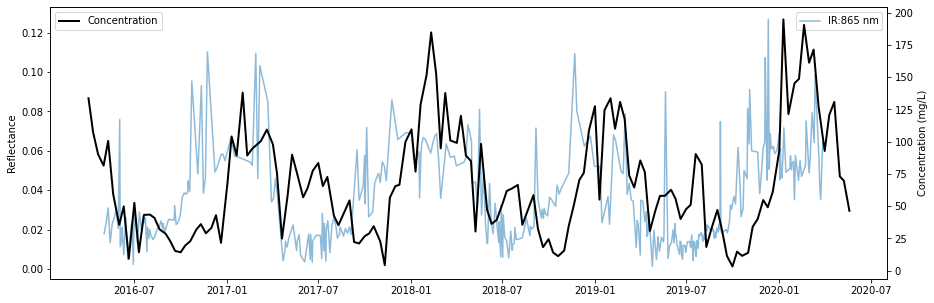

In [11]:
# create figure and axis objects with subplots()
plt.rcParams['figure.figsize'] = [15, 5]
fig, ax = plt.subplots()

# make a plot
# ax.plot(df_s3_srtd['Date'], df_s3_srtd['B8-665'], alpha=0.5, label='Red:665 nm')
ax.plot(df_s3_srtd['Date'], df_s3_srtd['B17-865'], alpha=0.5, label='IR:865 nm')
# ax.plot(df_s3_srtd['Date'], df_s3_srtd['B17-865']/df_s3_srtd['B8-665'], alpha=0.5, label='IR / Red')
# ax.axis(ymin=0, ymax=0.2)

# ax.plot(sed_2016['py_date'], sed_2016['Concentração (mg/L)'], label='Concentração')
# set x-axis label
# ax.set_xlabel("year",fontsize=14)a
# set y-axis label
ax.set_ylabel("Reflectance")

ax.legend(loc=1)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()

# make a plot with different y-axis using second axis object
ax2.plot(df_sed_srtd['py_date'], df_sed_srtd['Concentração (mg/L)'], c='k', linewidth=2, label='Concentration')
# ax2.plot(df_s3_srtd['Date'], df_s3_srtd['B17-865'], c='C1', label='Sentinel-3A')
ax2.set_ylabel("Concentration (mg/L)")

ax2.legend(loc=2)

plt.legend()
plt.show()

In [7]:
# Sedimentos Obidos JM
sed_xls = 'D:/processing/linux/17050001_obidos_v15b.xlsx'
# sed_xls = '/d_drive_data/processing/linux/17050001_obidos_v15b.xlsx'
df_sed = pd.read_excel(sed_xls,sheet_name='sedimentos')
df_sed_srtd = df_sed.sort_values(by='Data')

In [8]:
# Fix excel dates from ordinal (40603) to datetime.datetime(2011, 3, 1, 0, 0)
df_sed_srtd['py_date'] = [from_excel_ordinal(d) for d in df_sed_srtd['Data']]

In [9]:
# SEN3R reflectance series
s3_xls = 'D:/processing/linux/17050001_obidos_v15b.xlsx'
# s3_xls = '/d_drive_data/processing/linux/17050001_obidos_v15b.xlsx'
df_s3 = pd.read_excel(s3_xls,sheet_name='v15b')

# removes hour:minute:seconds from Sentinel-3 data.
df_s3['Date'] = [e.replace(hour=0, minute=0, second=0, microsecond=0) for e in df_s3['Datetime']]
df_s3_srtd = df_s3.sort_values(by='Date')

# drop quality flag 0
df_s3_srtd = df_s3_srtd[df_s3_srtd['quality'] > 0].copy()
df_s3_srtd = df_s3_srtd.reset_index()

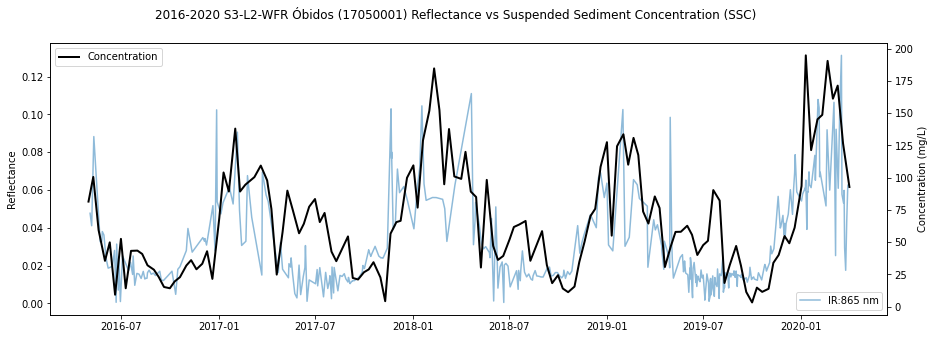

In [10]:
plt.rcParams['figure.figsize'] = [15, 5]
# create figure and axis objects with subplots()
fig, ax = plt.subplots()

fig.suptitle('2016-2020 S3-L2-WFR Óbidos (17050001) Reflectance vs Suspended Sediment Concentration (SSC)')

# make a plot
# ax.plot(df_s3_srtd['Date'], df_s3_srtd['B8-665'], alpha=0.5, label='Red:665 nm')
ax.plot(df_s3_srtd['Date'], df_s3_srtd['B17-865'], alpha=0.5, label='IR:865 nm')
# ax.plot(df_s3_srtd['Date'], df_s3_srtd['B17-865']/df_s3_srtd['B8-665'], alpha=0.5, label='IR / Red')
# ax.axis(ymin=0, ymax=0.2)

# ax.plot(sed_2016['py_date'], sed_2016['Concentração (mg/L)'], label='Concentração')
# set x-axis label
# ax.set_xlabel("year",fontsize=14)a
# set y-axis label
ax.set_ylabel("Reflectance")

ax.legend(loc=4)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()

# make a plot with different y-axis using second axis object
ax2.plot(df_sed_srtd['py_date'], df_sed_srtd['Concentração (mg/L)'], c='k', linewidth=2, label='Concentration')
# ax2.plot(df_s3_srtd['Date'], df_s3_srtd['B17-865'], c='C1', label='Sentinel-3A')
ax2.set_ylabel("Concentration (mg/L)")

ax2.legend()

plt.legend()
plt.show()

In [11]:
# MODIS-Terra
f_mod = 'D:/getmodis/17050001_MOD09Q1_commun_2009-2020.xls'
# f_mod = '/d_drive_data/getmodis/17050001_MOD09Q1_commun_2009-2020.xls'
df_mod = pd.read_excel(f_mod,sheet_name='MOD09Q1', converters={'Date': str})
df_mod['Date'] = df_mod['Nom'].apply(lambda x: datetime.strptime(x.split('_')[2][1:], '%Y%j').date())
df_mod_srtd = df_mod.sort_values(by='Date')
df_mod_srtd['Datetime'] = pd.to_datetime(df_mod_srtd['Date'], errors='coerce')
len(df_mod_srtd)

455

In [12]:
# MODIS-Terra
df_mod = pd.read_excel(f_mod,sheet_name='MOD09Q1', converters={'Date': str})
df_mod['Date'] = df_mod['Nom'].apply(lambda x: datetime.strptime(x.split('_')[2][1:], '%Y%j').date())
df_mod_srtd = df_mod.sort_values(by='Date')
df_mod_srtd['Datetime'] = pd.to_datetime(df_mod_srtd['Date'], errors='coerce')

print('S3',len(df_s3_srtd),'min',df_s3_srtd['Date'].min(),'max',df_s3_srtd['Date'].max())
print('MOD',len(df_mod_srtd),'min',df_mod_srtd['Datetime'].min(),'max',df_mod_srtd['Datetime'].max())

S3 401 min 2016-05-04 00:00:00 max 2020-03-29 00:00:00
MOD 455 min 2009-12-27 00:00:00 max 2020-11-24 00:00:00


In [13]:
# drop flags not in 1 and 2
df_mod_srtd = df_mod_srtd[(df_mod_srtd['flag qualite'] == 1) | (df_mod_srtd['flag qualite'] == 2)].copy()
len(df_mod_srtd)

427

In [14]:
# Testing for duplicate entries over input MODIS data
mod_dp = df_mod_srtd.duplicated(keep=False,subset=['Date'])
len(df_mod_srtd[mod_dp])

0

In [15]:
# Testing for duplicate entries over input S3 data
s3_dp = df_s3_srtd.duplicated(keep=False,subset=['Date'])
len(df_s3_srtd[s3_dp])

62

In [16]:
len(df_s3_srtd)

401

In [17]:
df_s3_srtd.drop_duplicates(subset=['Date'],keep='first',inplace=True)

In [18]:
# Drop outside S3 time range
out = df_mod_srtd[df_mod_srtd['Datetime'] < df_s3['Datetime'].min()].index
df_mod_srtd.drop(out, inplace=True)

out = df_mod_srtd[df_mod_srtd['Datetime'] > df_s3['Datetime'].max()].index
df_mod_srtd.drop(out, inplace=True)

len(df_mod_srtd)

141

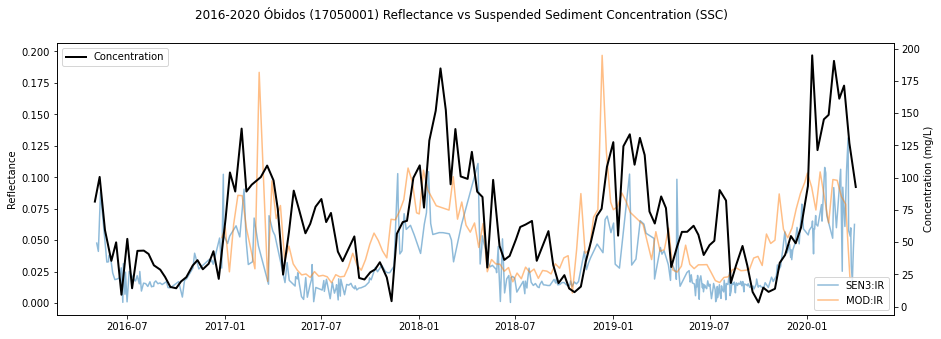

In [19]:
plt.rcParams['figure.figsize'] = [15, 5]
# create figure and axis objects with subplots()
fig, ax = plt.subplots()

fig.suptitle('2016-2020 Óbidos (17050001) Reflectance vs Suspended Sediment Concentration (SSC)')

# make a plot
# ax.plot(df_s3_srtd['Date'], df_s3_srtd['B8-665'], alpha=0.5, label='Red:665 nm')
ax.plot(df_s3_srtd['Datetime'], df_s3_srtd['B17-865'], alpha=0.5, label='SEN3:IR')
ax.plot(df_mod_srtd['Datetime'], df_mod_srtd['Bande IR estimee']/10000, alpha=0.5, label='MOD:IR')
# ax.plot(df_s3_srtd['Date'], df_s3_srtd['B17-865']/df_s3_srtd['B8-665'], alpha=0.5, label='IR / Red')
# ax.axis(ymin=0, ymax=0.2)

# ax.plot(sed_2016['py_date'], sed_2016['Concentração (mg/L)'], label='Concentração')
# set x-axis label
# ax.set_xlabel("year",fontsize=14)a
# set y-axis label
ax.set_ylabel("Reflectance")

ax.legend(loc=4)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()

# make a plot with different y-axis using second axis object
ax2.plot(df_sed_srtd['py_date'], df_sed_srtd['Concentração (mg/L)'], c='k', linewidth=2, label='Concentration')
# ax2.plot(df_s3_srtd['Date'], df_s3_srtd['B17-865'], c='C1', label='Sentinel-3A')
ax2.set_ylabel("Concentration (mg/L)")

ax2.legend()

plt.legend()
plt.show()

## Multiply the composite rows to fill in the missing day gaps

In [206]:
terra = df_mod_srtd.set_index('Datetime').resample('1D').ffill().reset_index()

In [207]:
len(terra), len(df_mod_srtd), len(df_s3_srtd)

(1182, 141, 370)

In [208]:
# Match Sentinel-3 observations
mod_mats3 = terra[terra['Datetime'].isin(df_s3_srtd['Date'])]
len(mod_mats3)

310

In [209]:
s3_mat_mod = df_s3_srtd[df_s3_srtd['Date'].isin(terra['Datetime'])]
len(s3_mat_mod)

310

In [194]:
s3_mat_mod['Date'].min(), mod_mats3['Datetime'].min()

(Timestamp('2016-12-28 00:00:00'), Timestamp('2016-12-28 00:00:00'))

In [193]:
s3_mat_mod['Date'].max(), mod_mats3['Datetime'].max()

(Timestamp('2020-03-21 00:00:00'), Timestamp('2020-03-21 00:00:00'))

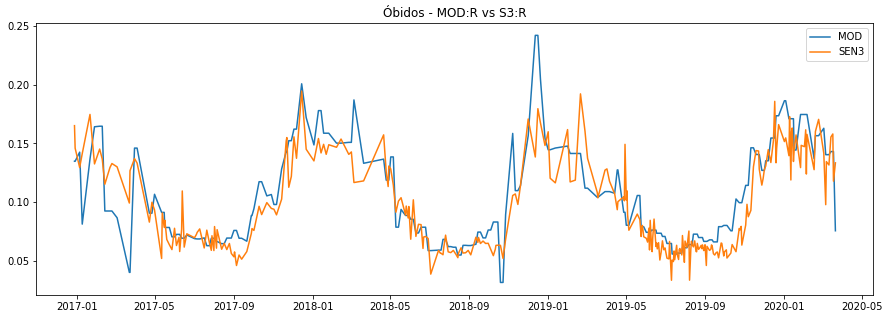

In [237]:
plt.rcParams['figure.figsize'] = [15, 5]
plt.title('Óbidos - MOD:R vs S3:R')
plt.plot(mod_mats3['Datetime'],mod_mats3['Bande rouge estimee']/10000,label='MOD')
plt.plot(s3_mat_mod['Date'],s3_mat_mod['B8-665'],label='SEN3')
plt.legend()

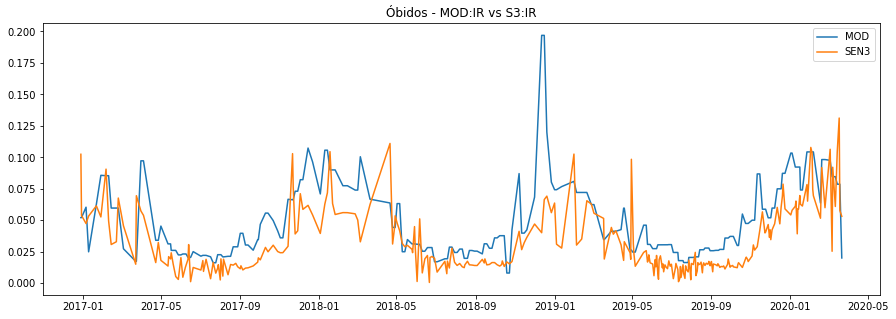

In [238]:
plt.rcParams['figure.figsize'] = [15, 5]
plt.title('Óbidos - MOD:IR vs S3:IR')
plt.plot(mod_mats3['Datetime'],mod_mats3['Bande IR estimee']/10000,label='MOD')
plt.plot(s3_mat_mod['Date'],s3_mat_mod['B17-865'],label='SEN3')
plt.legend()

In [188]:
# COMPUTING STATISTICS

In [214]:
r_mod, r_s3 = mod_mats3['Bande rouge estimee']/10000, s3_mat_mod['B8-665']
ir_mod, ir_s3 = mod_mats3['Bande IR estimee']/10000, s3_mat_mod['B17-865']

In [242]:
from sklearn.metrics import r2_score


print('r²\n','R:',r2_score(r_mod,r_s3),'\nIR:',r2_score(ir_mod,ir_s3))

r²
 R: 0.7195712292449068 
IR: 0.2559433490122509


In [241]:
from sklearn.metrics import mean_squared_error as mse

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

print('RMSE\n','R:',rmse(r_mod,r_s3),'\nIR:',rmse(ir_mod,ir_s3))

RMSE
 R: 0.052645114519052454 
IR: 0.03418959515625055


In [244]:
#https://stats.stackexchange.com/questions/280464/is-mape-a-good-error-measurement-statistic-and-what-alternatives-are-there

def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print('MAPE (%)\n','R:',mape(r_mod,r_s3),'\nIR:',mape(ir_mod,ir_s3))

MAPE (%)
 R: 16.31027335689583 
IR: 44.09043205606199


### MANACAPURU FIX

In [47]:
# Sedimentos Manacapuru JM
sed_xls = '/d_drive_data/processing/linux/14100000_manacapuru_v15_sedimentos.xlsx'
df_sed = pd.read_excel(sed_xls,sheet_name='sedimentos')
df_sed_srtd = df_sed.sort_values(by='Data')

In [48]:
# Fix excel dates from ordinal (40603) to datetime.datetime(2011, 3, 1, 0, 0)
df_sed_srtd['py_date'] = [from_excel_ordinal(d) for d in df_sed_srtd['Data']]

In [49]:
# SEN3R reflectance series
s3_xls = '/d_drive_data/processing/linux/14100000_manacapuru_v15_sedimentos.xlsx'
df_s3 = pd.read_excel(s3_xls,sheet_name='v15')

# removes hour:minute:seconds from Sentinel-3 data.
df_s3['Date'] = [e.replace(hour=0, minute=0, second=0) for e in df_s3['Datetime']]
df_s3_srtd = df_s3.sort_values(by='Date')

# drop quality flag 0
df_s3_srtd = df_s3_srtd[df_s3_srtd['quality'] > 0].copy()
df_s3_srtd = df_s3_srtd.reset_index()

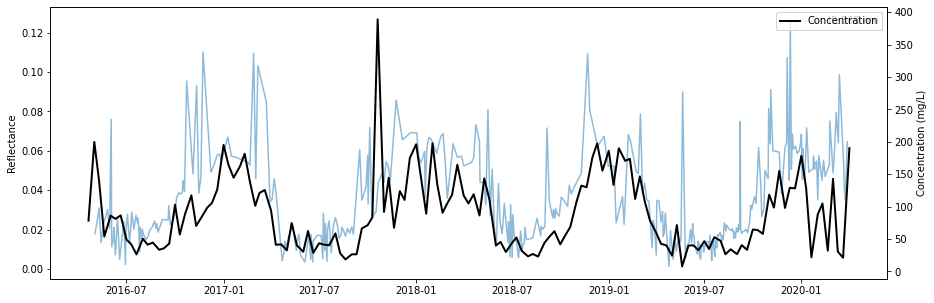

In [50]:
plt.rcParams['figure.figsize'] = [15, 5]
# create figure and axis objects with subplots()
fig, ax = plt.subplots()

# make a plot
# ax.plot(df_s3_srtd['Date'], df_s3_srtd['B8-665'], alpha=0.5, label='Red:665 nm')
ax.plot(df_s3_srtd['Date'], df_s3_srtd['B17-865'], alpha=0.5, label='IR:865 nm')
# ax.plot(df_s3_srtd['Date'], df_s3_srtd['B17-865']/df_s3_srtd['B8-665'], alpha=0.5, label='IR / Red')
# ax.axis(ymin=0, ymax=0.2)

# ax.plot(sed_2016['py_date'], sed_2016['Concentração (mg/L)'], label='Concentração')
# set x-axis label
# ax.set_xlabel("year",fontsize=14)a
# set y-axis label
ax.set_ylabel("Reflectance")

ax.legend(loc=1)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()

# make a plot with different y-axis using second axis object
ax2.plot(df_sed_srtd['py_date'], df_sed_srtd['Concentração (mg/L)'], c='k', linewidth=2, label='Concentration')
# ax2.plot(df_s3_srtd['Date'], df_s3_srtd['B17-865'], c='C1', label='Sentinel-3A')
ax2.set_ylabel("Concentration (mg/L)")

ax2.legend(loc=2)

plt.legend()
plt.show()

In [20]:
def power(x, a, b, c):return a*(x)**(b) + c

In [21]:
def SPM_GET_Amazon(b665, b865, cutoff_value=0.027, cutoff_delta=0.007, low_params=None, high_params=None, debug=False):

    if debug:
        pdb.set_trace()

    if cutoff_delta == 0:
        transition_coef = np.where(b665<=cutoff_value, 0, 1)

    else:
        transition_range = (cutoff_value - cutoff_delta, cutoff_value + cutoff_delta)
        transition_coef = (b665-transition_range[0])/(transition_range[1]-transition_range[0])

        transition_coef = np.clip(transition_coef, 0, 1)


    # if params are not passed, use default params obtained from the Amazon dataset
    low_params = [2.79101975e+05, 2.34858344e+00, 4.20023206e+00] if low_params is None else low_params
    high_params = [848.97770516,   1.79293191,   8.2788616 ] if high_params is None else high_params

    #low = Fit.power(b665, *low_params).fillna(0)
    #high = Fit.power(b865/b665, *high_params).fillna(0)

    low = power(b665, *low_params).fillna(0)
    high = power(b865/b665, *high_params).fillna(0)


    spm = (1-transition_coef)*low + transition_coef*high
    return spm

In [22]:
df_s3_srtd['SPM_GET_AMZ'] = SPM_GET_Amazon(b665=df_s3_srtd['B8-665'], b865=df_s3_srtd['B17-865'])

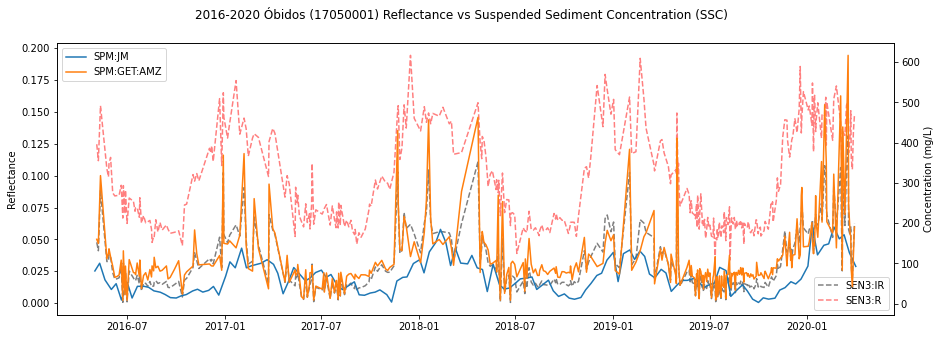

In [25]:
plt.rcParams['figure.figsize'] = [15, 5]
# create figure and axis objects with subplots()
fig, ax = plt.subplots()

fig.suptitle('2016-2020 Óbidos (17050001) Reflectance vs Suspended Sediment Concentration (SSC)')

# make a plot
# ax.plot(df_s3_srtd['Date'], df_s3_srtd['B8-665'], alpha=0.5, label='Red:665 nm')
ax.plot(df_s3_srtd['Datetime'], df_s3_srtd['B17-865'], alpha=0.5, c='k', linestyle='--', label='SEN3:IR')
ax.plot(df_s3_srtd['Datetime'], df_s3_srtd['B8-665'], alpha=0.5, c='r', linestyle='--', label='SEN3:R')
# ax.plot(df_mod_srtd['Datetime'], df_mod_srtd['Bande IR estimee']/10000, alpha=0.5, label='MOD:IR')
# ax.plot(df_s3_srtd['Date'], df_s3_srtd['B17-865']/df_s3_srtd['B8-665'], alpha=0.5, label='IR / Red')
# ax.axis(ymin=0, ymax=0.2)

# ax.plot(sed_2016['py_date'], sed_2016['Concentração (mg/L)'], label='Concentração')
# set x-axis label
# ax.set_xlabel("year",fontsize=14)a
# set y-axis label
ax.set_ylabel("Reflectance")

ax.legend(loc=4)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()

# make a plot with different y-axis using second axis object
ax2.plot(df_sed_srtd['py_date'], df_sed_srtd['Concentração (mg/L)'], label='SPM:JM')
ax2.plot(df_s3_srtd['Datetime'], df_s3_srtd['SPM_GET_AMZ'], label='SPM:GET:AMZ')
# ax2.plot(df_s3_srtd['Date'], df_s3_srtd['B17-865'], c='C1', label='Sentinel-3A')
ax2.set_ylabel("Concentration (mg/L)")

ax2.legend()

plt.legend()
plt.savefig('spm.png', dpi=100)
plt.show()
